In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing # Changed from load_boston

# Load dataset
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['price'] = california_housing.target

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
display(df.head())

Dataset loaded successfully!
Shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [30]:
# Check for missing values
print("Missing values:", df.isnull().sum().sum())

# Basic statistics
print("\nDataset Info:")
display(df.describe()) # Added display for better formatting

# Check correlations
correlation = df.corr()['price'].sort_values(ascending=False)
print("\nTop features correlated with PRICE:")
print(correlation[1:6])  # Top 5 excluding PRICE itself

Missing values: 0

Dataset Info:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010



Top features correlated with PRICE:
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Name: price, dtype: float64


In [32]:
# Define features and target
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target

# Split data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 16512 samples
Testing set: 4128 samples


In [33]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("✅ Linear Regression model trained successfully!")

✅ Linear Regression model trained successfully!


In [34]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MODEL EVALUATION METRICS:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Model explains {r2*100:.1f}% of the variance")

MODEL EVALUATION METRICS:
Mean Absolute Error (MAE): 0.5332
Mean Squared Error (MSE): 0.5559
R² Score: 0.5758
Model explains 57.6% of the variance


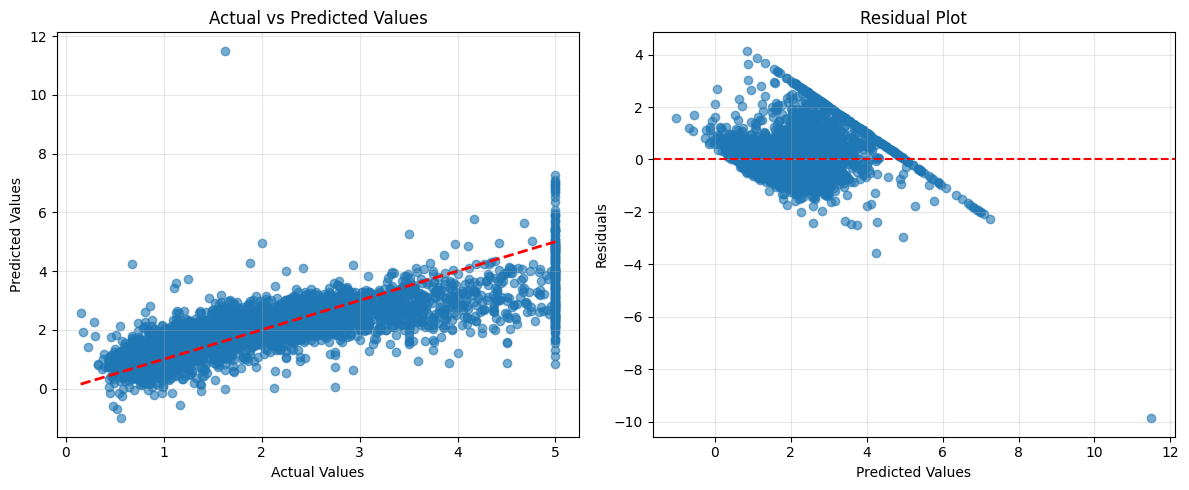


MODEL INTERPRETATION:
Intercept: -37.0233

Top 5 Most Important Features:
• AveBedrms: increases price by 0.783 units
• MedInc: increases price by 0.449 units
• Longitude: decreases price by 0.434 units
• Latitude: decreases price by 0.420 units
• AveRooms: decreases price by 0.123 units


In [35]:
# Plot Actual vs Predicted
plt.figure(figsize=(12, 5))

# Subplot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True, alpha=0.3)

# Subplot 2: Residual plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Interpret coefficients
print("\nMODEL INTERPRETATION:")
print(f"Intercept: {model.intercept_:.4f}")
print("\nTop 5 Most Important Features:")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
top_features = feature_importance.nlargest(5, 'Abs_Coefficient')

for _, row in top_features.iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"• {row['Feature']}: {direction} price by {abs(row['Coefficient']):.3f} units")

In [36]:
# Show sample predictions
print("SAMPLE PREDICTIONS:")
print("-" * 40)
sample_size = 5
sample_actual = y_test.head(sample_size).values
sample_predicted = y_pred[:sample_size]

for i in range(sample_size):
    error = abs(sample_actual[i] - sample_predicted[i])
    print(f"Sample {i+1}: Actual=${sample_actual[i]:.1f}k, Predicted=${sample_predicted[i]:.1f}k, Error=${error:.1f}k")

print(f"\nAverage prediction error: ${np.mean(np.abs(y_test - y_pred)):.2f}k")
print("\n✅ TASK COMPLETED SUCCESSFULLY!")

SAMPLE PREDICTIONS:
----------------------------------------
Sample 1: Actual=$0.5k, Predicted=$0.7k, Error=$0.2k
Sample 2: Actual=$0.5k, Predicted=$1.8k, Error=$1.3k
Sample 3: Actual=$5.0k, Predicted=$2.7k, Error=$2.3k
Sample 4: Actual=$2.2k, Predicted=$2.8k, Error=$0.7k
Sample 5: Actual=$2.8k, Predicted=$2.6k, Error=$0.2k

Average prediction error: $0.53k

✅ TASK COMPLETED SUCCESSFULLY!
